<a href="https://colab.research.google.com/github/Philocreation/My_Deep_learning/blob/main/Template/darknet_yolov3_face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 0. 임포트

In [1]:
import cv2
import matplotlib.pyplot as plt
import glob


# 1. 구글 드라이브 마운트, mydrive로 링크

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
!ln -s /content/gdrive/MyDrive/ /mydrive

# 2. Darknet 다운받아서 컴파일

## 프로젝트 다운로드

In [4]:
!git clone https://github.com/AlexeyAB/darknet.git

Cloning into 'darknet'...
remote: Enumerating objects: 15395, done.
remote: Total 15395 (delta 0), reused 0 (delta 0), pack-reused 15395
Receiving objects: 100% (15395/15395), 13.99 MiB | 9.94 MiB/s, done.
Resolving deltas: 100% (10354/10354), done.


OpenCV, GPU, CuDNN 사용 관련 설정하고 컴파일

In [5]:
%cd darknet

/content/darknet


## 컴파일 설정 파일 수정

In [6]:
!sed -i 's/OPENCV=0/OPENCV=1/' Makefile
!sed -i 's/GPU=0/GPU=1/' Makefile
!sed -i 's/CUDNN=0/CUDNN=1/' Makefile

## 컴파일

In [7]:
!make

mkdir -p ./obj/
mkdir -p backup
chmod +x *.sh
g++ -std=c++11 -std=c++11 -Iinclude/ -I3rdparty/stb/include -DOPENCV `pkg-config --cflags opencv4 2> /dev/null || pkg-config --cflags opencv` -DGPU -I/usr/local/cuda/include/ -DCUDNN -Wall -Wfatal-errors -Wno-unused-result -Wno-unknown-pragmas -fPIC -Ofast -DOPENCV -DGPU -DCUDNN -I/usr/local/cudnn/include -c ./src/image_opencv.cpp -o obj/image_opencv.o
./src/image_opencv.cpp: In function ‘void draw_detections_cv_v3(void**, detection*, int, float, char**, image**, int, int)’:
./src/image_opencv.cpp:946:23: warning: variable ‘rgb’ set but not used [-Wunused-but-set-variable]
                 float rgb[3];
                       ^~~
./src/image_opencv.cpp: In function ‘void draw_train_loss(char*, void**, int, float, float, int, int, float, int, char*, float, int, int, double)’:
./src/image_opencv.cpp:1147:13: warning: this ‘if’ clause does not guard... [-Wmisleading-indentation]
             if (iteration_old == 0)
             ^~
./src/image_

# 3. 데이터 준비
- darknet/data/obj에 latops_labeled.zip 압축 풀기
- classes.names와 training.data 파일 생성
- training.txt 파일 생성


In [8]:
# !ls -al /mydrive/tmp/laptops_labeled.zip
!ls -al /content/gdrive/MyDrive/face.zip

-rw------- 1 root root 1884811 Jan 12 08:34 /content/gdrive/MyDrive/face.zip


## data/obj/laptops_labeled 폴더에 압축 풀기

In [9]:
!rm -rf data/obj
!mkdir data/obj
# !unzip /mydrive/tmp/laptops_labeled.zip -d data/obj
!unzip /content/gdrive/MyDrive/face.zip -d data/obj/face

Archive:  /content/gdrive/MyDrive/face.zip
  inflating: data/obj/face/face/dog_1.jpg  
  inflating: data/obj/face/face/dog_1.txt  
  inflating: data/obj/face/face/dog_10.jpg  
  inflating: data/obj/face/face/dog_10.txt  
  inflating: data/obj/face/face/dog_2.jpg  
  inflating: data/obj/face/face/dog_2.txt  
  inflating: data/obj/face/face/dog_3.jpg  
  inflating: data/obj/face/face/dog_3.txt  
  inflating: data/obj/face/face/dog_4.jpg  
  inflating: data/obj/face/face/dog_4.txt  
  inflating: data/obj/face/face/dog_5.jpg  
  inflating: data/obj/face/face/dog_5.txt  
  inflating: data/obj/face/face/dog_6.jpg  
  inflating: data/obj/face/face/dog_6.txt  
  inflating: data/obj/face/face/dog_7.jpg  
  inflating: data/obj/face/face/dog_7.txt  
  inflating: data/obj/face/face/dog_8.jpg  
  inflating: data/obj/face/face/dog_8.txt  
  inflating: data/obj/face/face/dog_9.jpg  
  inflating: data/obj/face/face/dog_9.txt  
  inflating: data/obj/face/face/ein_1.jpg  
  inflating: data/obj/face/face

## 학습 위한 설정 파일 생성

학습에 직접 사용할 data/obj.names, data/obj.data, data/train.txt 파일을 생성한다.

<br>

data/obj.names
```
laptop
keyboard
```

<br>

data/obj.data
```
classes = 80
train = data/train.txt
valid = data/test.txt
names = data/obj.names
backup = /mydrive/tmp/custom_object_detection
```

<br>

data/train.txt
```
data/obj/laptops_labeled/8.jpg
data/obj/laptops_labeled/10.jpg
data/obj/laptops_labeled/12.jpg
data/obj/laptops_labeled/2.jpg
data/obj/laptops_labeled/6.jpg
data/obj/laptops_labeled/11.jpg
data/obj/laptops_labeled/1.jpg
data/obj/laptops_labeled/7.jpg
data/obj/laptops_labeled/5.jpg
data/obj/laptops_labeled/9.jpg
data/obj/laptops_labeled/3.jpg
data/obj/laptops_labeled/4.jpg
...
```



### data/obj.names

In [10]:
%%writefile data/obj.names
face

Writing data/obj.names


In [11]:
!cat data/obj.names

face

In [12]:
!cp data/obj.names data/coco.names

### data/obj.data

In [13]:
%%writefile data/obj.data
classes = 1
train = data/train.txt
valid = data/test.txt
names = /content/darknet/data/obj.names
backup = /mydrive/tmp

Writing data/obj.data


In [14]:
!cat data/obj.data

classes = 1
train = data/train.txt
valid = data/test.txt
names = /content/darknet/data/obj.names
backup = /mydrive/tmp

### data/train.txt


In [15]:
!ls -al data/obj/face/face

total 2344
drwxr-xr-x 2 root root   4096 Jan 13 00:21 .
drwxr-xr-x 3 root root   4096 Jan 13 00:21 ..
-rw-r--r-- 1 root root   8166 Jan  6 15:44 dog_10.jpg
-rw-r--r-- 1 root root     37 Jan 12 17:28 dog_10.txt
-rw-r--r-- 1 root root   3898 Jan  6 15:43 dog_1.jpg
-rw-r--r-- 1 root root     37 Jan 12 17:28 dog_1.txt
-rw-r--r-- 1 root root   4825 Jan  6 15:43 dog_2.jpg
-rw-r--r-- 1 root root     37 Jan 12 17:28 dog_2.txt
-rw-r--r-- 1 root root   4206 Jan  6 15:43 dog_3.jpg
-rw-r--r-- 1 root root     37 Jan 12 17:28 dog_3.txt
-rw-r--r-- 1 root root   3039 Jan  6 15:44 dog_4.jpg
-rw-r--r-- 1 root root     37 Jan 12 17:28 dog_4.txt
-rw-r--r-- 1 root root   6202 Jan  6 15:44 dog_5.jpg
-rw-r--r-- 1 root root     37 Jan 12 17:28 dog_5.txt
-rw-r--r-- 1 root root   3308 Jan  6 15:44 dog_6.jpg
-rw-r--r-- 1 root root     37 Jan 12 17:28 dog_6.txt
-rw-r--r-- 1 root root   3954 Jan  6 15:44 dog_7.jpg
-rw-r--r-- 1 root root     37 Jan 12 17:28 dog_7.txt
-rw-r--r-- 1 root root   7065 Jan  6 15:44 dog_8

In [16]:
# ls -al data/obj/laptops_labeled 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/laptops_labeled/*[jpg|png|jpeg]")
images_list = glob.glob("/content/darknet/data/obj/face/face/*[jpg|png|jpeg]")

# ls -al data/obj 밑에 jpg 파일들이 있으면
# images_list = glob.glob("data/obj/*[jpg|png|jpeg]")

print(images_list)

# Create train.txt file
file = open("data/train.txt", "w") 
file.write("\n".join(images_list)) 
file.close() 

['/content/darknet/data/obj/face/face/iu_1.jpg', '/content/darknet/data/obj/face/face/musk_2.jpg', '/content/darknet/data/obj/face/face/dog_5.jpg', '/content/darknet/data/obj/face/face/shin_7.jpg', '/content/darknet/data/obj/face/face/son_9.jpg', '/content/darknet/data/obj/face/face/son_2.jpg', '/content/darknet/data/obj/face/face/musk_1.jpg', '/content/darknet/data/obj/face/face/jung_9.jpg', '/content/darknet/data/obj/face/face/hong_7.jpg', '/content/darknet/data/obj/face/face/hong_2.jpg', '/content/darknet/data/obj/face/face/dog_3.jpg', '/content/darknet/data/obj/face/face/musk_9.jpg', '/content/darknet/data/obj/face/face/dog_10.jpg', '/content/darknet/data/obj/face/face/dog_6.jpg', '/content/darknet/data/obj/face/face/musk_10.jpg', '/content/darknet/data/obj/face/face/iu_3.jpg', '/content/darknet/data/obj/face/face/musk_8.jpg', '/content/darknet/data/obj/face/face/hong_6.jpg', '/content/darknet/data/obj/face/face/dog_2.jpg', '/content/darknet/data/obj/face/face/hong_9.jpg', '/conten

In [17]:
!cat data/train.txt

/content/darknet/data/obj/face/face/iu_1.jpg
/content/darknet/data/obj/face/face/musk_2.jpg
/content/darknet/data/obj/face/face/dog_5.jpg
/content/darknet/data/obj/face/face/shin_7.jpg
/content/darknet/data/obj/face/face/son_9.jpg
/content/darknet/data/obj/face/face/son_2.jpg
/content/darknet/data/obj/face/face/musk_1.jpg
/content/darknet/data/obj/face/face/jung_9.jpg
/content/darknet/data/obj/face/face/hong_7.jpg
/content/darknet/data/obj/face/face/hong_2.jpg
/content/darknet/data/obj/face/face/dog_3.jpg
/content/darknet/data/obj/face/face/musk_9.jpg
/content/darknet/data/obj/face/face/dog_10.jpg
/content/darknet/data/obj/face/face/dog_6.jpg
/content/darknet/data/obj/face/face/musk_10.jpg
/content/darknet/data/obj/face/face/iu_3.jpg
/content/darknet/data/obj/face/face/musk_8.jpg
/content/darknet/data/obj/face/face/hong_6.jpg
/content/darknet/data/obj/face/face/dog_2.jpg
/content/darknet/data/obj/face/face/hong_9.jpg
/content/darknet/data/obj/face/face/son_4.jpg
/content/darknet/data/o

# 4. 사전 학습된 YOLOv3 모델 파일 다운로드

In [18]:
!wget https://pjreddie.com/media/files/darknet53.conv.74

--2022-01-13 00:21:56--  https://pjreddie.com/media/files/darknet53.conv.74
Resolving pjreddie.com (pjreddie.com)... 128.208.4.108
Connecting to pjreddie.com (pjreddie.com)|128.208.4.108|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 162482580 (155M) [application/octet-stream]
Saving to: ‘darknet53.conv.74’

darknet53.conv.74   100%[===================>] 154.96M  23.2MB/s    in 7.4s    

2022-01-13 00:22:04 (20.9 MB/s) - ‘darknet53.conv.74’ saved [162482580/162482580]



# 5. 학습관련 설정 파일 수정

원 설정파일 yolov3.cfg를 yolv3_custom.cfg로 복사하고

복사한 설정파일을 수정

In [19]:
# 탐지 대상 클래스 수를 설정
CLASS_NUM = 1

In [20]:
!cp cfg/yolov3.cfg cfg/yolov3_custom.cfg

classes = CLASS_NUM
filters = (classes + 5) * 3
max_batches = classes * 2000
steps1 = int(max_batches*0.8)
steps2 = int(max_batches*0.9)
if max_batches < 6000:
  max_batches = 6000

# Edit classes & filters
!sed -i 's/batch=1/batch=64/' cfg/yolov3_custom.cfg
!sed -i 's/subdivisions=1/subdivisions=16/' cfg/yolov3_custom.cfg
!sed -i 's/max_batches = 500200/max_batches = $max_batches/' cfg/yolov3_custom.cfg
!sed -i '610 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '696 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '783 s@classes=80@classes=$classes@' cfg/yolov3_custom.cfg
!sed -i '603 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '689 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i '776 s@filters=255@filters=$filters@' cfg/yolov3_custom.cfg
!sed -i 's/steps=400000,450000/steps=$steps1,$steps2/' cfg/yolov3_custom.cfg

# 6. 학습 실행

학습된 모델은  /mydrive/tmp/yolov3_custom_last.weights 로 저장된다.

In [21]:
!./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74 -dont_show
# !./darknet detector train data/obj.data cfg/yolov3_custom.cfg darknet53.conv.74

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
 total_bbox = 367531, rewritten_bbox = 0.000000 % 
]2;5926/6000: loss=0.0 hours left=0.2
 5926: 0.042708, 0.038332 avg loss, 0.000010 rate, 5.189284 seconds, 379264 images, 0.157936 hours left
Loaded: 0.000093 seconds
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.870133), count: 4, class_loss = 0.004094, iou_loss = 0.085259, total_loss = 0.089353 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 94 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 106 Avg (IOU: 0.000000), count: 1, class_loss = 0.000000, iou_loss = 0.000000, total_loss = 0.000000 
 total_bbox = 367535, rewritten_bbox = 0.000000 % 
v3 (mse loss, Normalizer: (iou: 0.75, obj: 1.00, cls: 1.00) Region 82 Avg (IOU: 0.870779), count: 4, class_loss = 0.107603, iou_loss = 0.066147, total_loss = 0.173750 
v3 (mse loss, Normal

## 7. 탐지 실행

In [25]:
!./darknet detect cfg/yolov3_custom.cfg /mydrive/tmp/yolov3_custom_last.weights /content/darknet/data/obj/face/iu_11.jpg

 CUDA-version: 11010 (11020), cuDNN: 7.6.5, GPU count: 1  
 OpenCV version: 3.2.0
 0 : compute_capability = 600, cudnn_half = 0, GPU: Tesla P100-PCIE-16GB 
net.optimized_memory = 0 
mini_batch = 1, batch = 16, time_steps = 1, train = 0 
   layer   filters  size/strd(dil)      input                output
   0 Create CUDA-stream - 0 
 Create cudnn-handle 0 
conv     32       3 x 3/ 1    416 x 416 x   3 ->  416 x 416 x  32 0.299 BF
   1 conv     64       3 x 3/ 2    416 x 416 x  32 ->  208 x 208 x  64 1.595 BF
   2 conv     32       1 x 1/ 1    208 x 208 x  64 ->  208 x 208 x  32 0.177 BF
   3 conv     64       3 x 3/ 1    208 x 208 x  32 ->  208 x 208 x  64 1.595 BF
   4 Shortcut Layer: 1,  wt = 0, wn = 0, outputs: 208 x 208 x  64 0.003 BF
   5 conv    128       3 x 3/ 2    208 x 208 x  64 ->  104 x 104 x 128 1.595 BF
   6 conv     64       1 x 1/ 1    104 x 104 x 128 ->  104 x 104 x  64 0.177 BF
   7 conv    128       3 x 3/ 1    104 x 104 x  64 ->  104 x 104 x 128 1.595 BF
   8 Shortcu

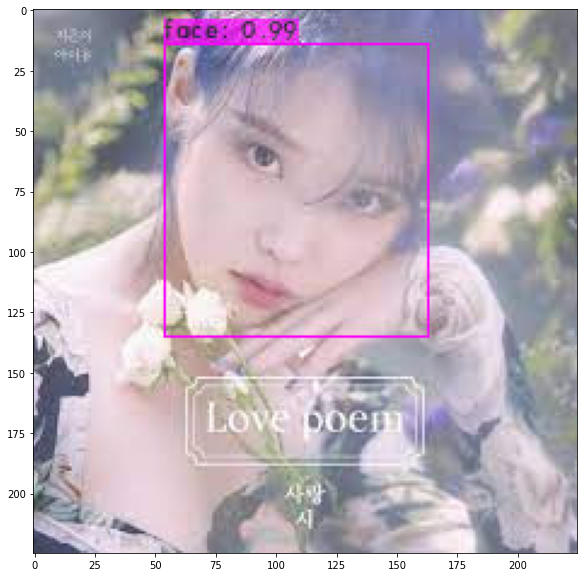

In [27]:
pred = plt.imread('predictions.jpg')
plt.figure(figsize=(10,10))
plt.imshow(pred)
plt.show()

In [39]:
HOME = "/content"

In [53]:
GDRIVE_PATH = "/content/gdrive/MyDrive/tmp"
FACE_DETECTION_MODEL_FILE = "yolov3_custom_last.weights"
FACE_CLASSIFICATION_MODEL_FILE = "face_classification.h5"
DATA_FILE_NAME = "face.zip"
class_names = [ "Tom", "Jerry" ]

In [65]:
TARGET_PATH = "/content/sample_data"
CROPPED_PATH = TARGET_PATH+"/cropped"

In [66]:
%cd {HOME}

/content


In [43]:
!git clone https://github.com/dhrim/darkeras-yolov4

Cloning into 'darkeras-yolov4'...
remote: Enumerating objects: 168, done.
remote: Counting objects: 100% (168/168), done.
remote: Compressing objects: 100% (147/147), done.
remote: Total 168 (delta 83), reused 37 (delta 16), pack-reused 0
Receiving objects: 100% (168/168), 5.57 MiB | 12.32 MiB/s, done.
Resolving deltas: 100% (83/83), done.


In [44]:
%cd darkeras-yolov4

/content/darkeras-yolov4


## 데이터 다운로드

In [47]:
!rm -rf face
!unzip /content/gdrive/MyDrive/tmp/face_data.zip -d face

Archive:  /content/gdrive/MyDrive/tmp/face_data.zip
  inflating: face/face_data/Images/faker_1.jpg  
  inflating: face/face_data/Images/faker_10.jpg  
  inflating: face/face_data/Images/faker_11.jpg  
  inflating: face/face_data/Images/faker_12.jpg  
  inflating: face/face_data/Images/faker_13.jpg  
  inflating: face/face_data/Images/faker_14.jpg  
  inflating: face/face_data/Images/faker_15.jpg  
  inflating: face/face_data/Images/faker_16.jpg  
  inflating: face/face_data/Images/faker_2.jpg  
  inflating: face/face_data/Images/faker_3.jpg  
  inflating: face/face_data/Images/faker_4.jpg  
  inflating: face/face_data/Images/faker_5.jpg  
  inflating: face/face_data/Images/faker_6.jpg  
  inflating: face/face_data/Images/faker_7.jpg  
  inflating: face/face_data/Images/faker_8.jpg  
  inflating: face/face_data/Images/faker_9.jpg  
  inflating: face/face_data/Images/iu_1.jpg  
  inflating: face/face_data/Images/iu_10.jpg  
  inflating: face/face_data/Images/iu_11.jpg  
  inflating: face

## 모델 로딩

In [54]:
import yolov3_wrapper
detection_model = yolov3_wrapper.YoloV3Wrapper(GDRIVE_PATH+"/"+FACE_DETECTION_MODEL_FILE, class_num=1)

## 얼굴 탐지와 crop 이미지 저장

In [55]:
!mkdir -p {CROPPED_PATH}

In [59]:
import glob
file_list = glob.glob(TARGET_PATH)
print(len(file_list))
print(file_list[:2])

1
['/content/darknet/data/obj/face/iu_11.jpg']


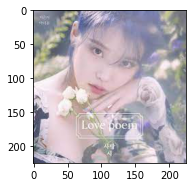

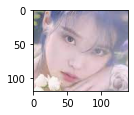

saved as iu_11_cropped_0.jpg


In [67]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def show_image(image):

    DPI = 80.
    height, width, depth = image.shape
    fig = plt.figure(figsize=(width/DPI, height/DPI))
    plt.imshow(image)
    plt.show()

def get_detection_cropped(model, image):

    bboxes = model.predict(image)

    cropped = []
    for box in bboxes:
        x1, y1, x2, y2 = box[:4].astype(np.int)
        confidence = box[4]
        class_id = int(box[5])
        cropped.append(image[y1:y2,x1:x2,:])

    return cropped, bboxes

def save_cropped(path, file_name, i, cropped):

    new_name = file_name.split("/")[-1].replace(".jpg", "_cropped_{}.jpg".format(i))
    plt.imsave(new_name, cropped)
    print("saved as {}".format(new_name))

for file_name in file_list:

    image = plt.imread(file_name)
    show_image(image)

    croppeds, _ = get_detection_cropped(detection_model, image)

    for i, cropped in enumerate(croppeds):
        show_image(cropped)
        save_cropped(CROPPED_PATH, file_name, i, cropped)


In [68]:
!ls -al {CROPPED_PATH}

print()
print(CROPPED_PATH)

ls: cannot access '/content/sample_data/cropped': No such file or directory

/content/sample_data/cropped


# 얼굴 인식

## 모델 로딩

In [ ]:
from tensorflow import keras
classificaiton_model = keras.models.load_model(GDRIVE_PATH+"/"+FACE_CLASSIFICATION_MODEL_FILE)

In [ ]:
def classify(model, images):
    def resize(image):
        return cv2.resize(image, (224, 224))
    resizeds = np.array([ resize(image) for image in images ])
    y_ = model.predict(resizeds)
    class_ids = np.argmax(y_, axis=-1)
    confidences = np.max(y_, axis=-1)
    return class_ids, confidences

In [ ]:
target_file_name = "face/test/raccoon-57_jpg.rf.26f3fae218f26088f6a7405c58ae8020.jpg"

image = plt.imread(target_file_name)
show_image(image)

croppeds, bboxes = get_detection_cropped(detection_model, image)
for cropped in croppeds:
    show_image(cropped)

class_ids, confidences = classify(classificaiton_model, croppeds)
print(class_ids, confidences)


